<a href="https://colab.research.google.com/github/DavidJeonKr/lab_python/blob/master/py25_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# 다음주에는 3개의 데이터를 합쳐주는 작업을 함
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'

* movies.dat 파일을 읽고 DataFrame 생성.
* DataFrame 탐색.
* 장르가 'Animation'인 영화는 몇 개?
* 장르가 로맨틱 코미디인 영화는 몇 개?

In [8]:
col_name = ['movie_id', 'title','genres']
movies = pd.read_csv(file_path, sep='::', names=col_name, engine='python')

In [134]:
movies.loc[2239]

movie_id                   2308
title       Detroit 9000 (1973)
genres             Action|Crime
year                       1973
Name: 2239, dtype: object

In [55]:
movies.tail(4)

,movie_id,title,genres
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [19]:
# 'Animation' 장르의 영화 몇 개인가?
animations = movies[movies['genres'].str.contains('Animation')]

In [20]:
len(animations)

105

In [24]:
# movies[movies['genres'].str.contains('Animation','Romance')]
romantic_comedies = movies[(movies['genres'].str.contains('Romance')) &
                           (movies['genres'].str.contains('Comedy'))]
romantic_comedies

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


In [25]:
len(romantic_comedies)

204

In [37]:
#가장 많이 나온 장르
genres = [] # 개별 영화 장르를 저장할 빈 리스트
for s in movies['genres']:
    genres.extend(s.split(sep='|'))
len(genres)

6408

In [39]:
genre_counts = pd.value_counts(genres)
genre_counts

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

In [40]:
top7 = genre_counts.head(7)
top7

Drama        1603
Comedy       1200
Action        503
Thriller      492
Romance       471
Horror        343
Adventure     283
dtype: int64

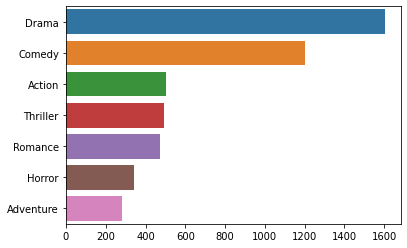

In [41]:
sns.barplot(y=top7.index, x=top7.values)
plt.show()

In [45]:
bottom7 = genre_counts.tail(7)
bottom7

Documentary    127
Musical        114
Mystery        106
Animation      105
Fantasy         68
Western         68
Film-Noir       44
dtype: int64

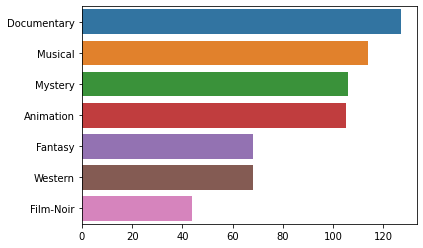

In [46]:
sns.barplot(x=bottom7.values, y=bottom7.index)
plt.show()

In [52]:
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['genre', 'counts']
genre_counts_df

,genre,counts
0,Drama,1603
1,Comedy,1200
2,Action,503
3,Thriller,492
4,Romance,471
5,Horror,343
6,Adventure,283
7,Sci-Fi,276
8,Children's,251
9,Crime,211


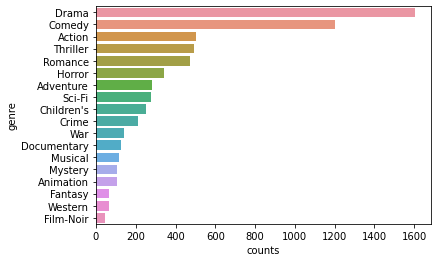

In [54]:
sns.barplot(x='counts', y='genre', data=genre_counts_df)
plt.show()

# 연도별 영화 개봉 숫자, 시각화
* lineplot
* year column


In [133]:
#movies['year'] = movies.title.str.extract(pat='([0-9][0-9][0-9][0-9])')
movies['year'] = movies.title.str[-5:-1]
movies.head(4)

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995


In [ ]:
# t1 = movies['title']
# years = t1.str.extract('(\d\d\d\d)')
# years.columns = ['year']
# years
#movies['year'] = years
#movies.head(4)

In [156]:
years = movies['year'].value_counts().sort_index()
years

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

In [159]:
df_year = years.reset_index()
df_year.columns=['year', 'value']
df_year

,year,value
0,1919,3
1,1920,2
2,1921,1
3,1922,2
4,1923,3
...,...,...
76,1996,345
77,1997,315
78,1998,337
79,1999,283


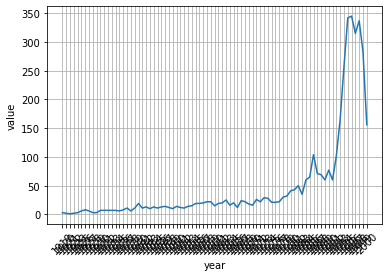

In [168]:
sns.lineplot(x='year',y='value', data=df_year,)
plt.xticks(rotation=45)
plt.grid()
plt.show()